<a href="https://colab.research.google.com/github/youseefmoemen/Viterbi-Algorithm/blob/main/Viterbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def Viterbi(prior, emittion, transition, states, observations):
  values = np.zeros(shape = (len(states), len(observations)))
  for idx, state in enumerate(states):
    values[idx][0] = prior[state] * emittion[observations[0]][state]
  for observation_idx, observation in enumerate(observations[1:]):
    for state_idx, state in enumerate(states):
      values[state_idx][observation_idx+1] = max(
          [values[state_idx_][observation_idx] * transition[state_][state] *
           emittion[observation][state]
           for state_idx_, state_ in enumerate(states)]
      )
  path = []
  for value in values.T:
    path.append(states[np.argmax(value)])
  return values, path

In [3]:
# Test Data
prior_ = {
    'sunny': 0.67, 
    'rainy': 0.33
}
states_ = ('sunny', 'rainy')
observations_ = ['happy', 'happy', 'sad', 'sad', 'sad', 'happy']
transition_ = {
    'sunny': {
        'sunny': 0.8,
        'rainy': 0.2
    },
    'rainy': {
        'sunny': 0.4,
        'rainy': 0.6
    }
}
emittion_ = {
    'happy': {
        'sunny': 0.8,
        'rainy': 0.4
    },
    'sad': {
        'sunny': 0.2, 
        'rainy': 0.6
    }
}

In [4]:
mat, path = Viterbi(prior=prior_, emittion=emittion_, transition=transition_,
        states = states_, observations=observations_)

In [5]:
print(path)

['sunny', 'sunny', 'sunny', 'rainy', 'rainy', 'sunny']


In [6]:
print(mat)

[[0.536      0.34304    0.0548864  0.00878182 0.00140509 0.00170719]
 [0.132      0.04288    0.0411648  0.01481933 0.00533496 0.00128039]]


In [7]:
def func(transition, emittion):
  G = nx.DiGraph()
  for k in [transition_, emittion]:
    for state_from in k:
      for state_to in k[state_from]:
        G.add_weighted_edges_from([(state_from, state_to,
                                  k[state_from][state_to])])
  return G   

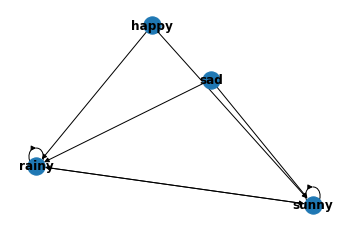

In [8]:
from IPython.core.pylabtools import figsize
G = func(transition=transition_, emittion=emittion_)
subax1 = plt.plot(figsize=(10, 10))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [9]:
print('Hello, World')

Hello, World
